**1.**导入需要的包

In [1]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# 作图的库需要安装python-graphviz
import graphviz

**2.**导入数据集，搜索数据

In [2]:
#index
data = pd.read_csv(r"E:\train.csv",index_col= 0)
#显示前n个（默认5）数据
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#决策树只支持数字型的特征输入，所以下面所有object类的数据要用的话全都要转成数字形式
#年龄和Cabin有缺失值，需要处理
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**3.**对数据集进行预处理

In [4]:
#筛选特征，去掉一些不用/缺失太多（python不会进行填充）的参数
#drop函数就可以删除指定列名的列；inplace表示用删除完毕的表来覆盖原表（默认false）；axis表示对行/列进行删除（1是列，0是行）
data.drop(["Cabin","Name","Ticket"],inplace=True,axis=1)

In [5]:
#处理缺失值
#fillna()表示对缺失值用括号里的值进行填充(这里用的是均值）；
data["Age"] = data["Age"].fillna(data["Age"].mean())



In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [7]:
#对于Embarked这种只少了2行的，直接删了就好
#dropna()删掉所有有缺失值的行（可以用axis改成列，没必要，默认是0）
data = data.dropna()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [9]:
#将分类变量转化为数值型变量

#三分类变量
#找到Embarked类有多少种取值，并转为列表
labels = data["Embarked"].unique().tolist()
#apply表示在指定的列上执行括号中的操作,这里的操作就是把每一个字符串数据转换成数值数据
#这里要求不同的取值之间没有联系才能这么做
data["Embarked"] = data["Embarked"].apply(lambda x:labels.index(x))

In [10]:
#二分类变量
#根据判断的结果（Boolean值)来进行赋值
data["Sex"] = (data["Sex"]== "male").astype("int")

#报红是因为没改用loc/iloc（其实无所谓）
#上面的语句可以转为data.loc[:,"Sex"]/iloc[:,3]
#loc后面的列只能输入列名，而iloc后面只能输入第几列

In [11]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.000000,1,0,7.2500,0
2,1,1,0,38.000000,1,0,71.2833,1
3,1,3,0,26.000000,0,0,7.9250,0
4,1,1,0,35.000000,1,0,53.1000,0
5,0,3,1,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
887,0,2,1,27.000000,0,0,13.0000,0
888,1,1,0,19.000000,0,0,30.0000,0
889,0,3,0,29.699118,1,2,23.4500,0


**4.** 提取标签和特征矩阵，分测试集和训练集

In [12]:
#x取出除了Survived的其他列，这里相当于Ture的全都取出来
X = data.iloc[:,data.columns != "Survived"]
#y就取Survived这一列
y = data.iloc[:,data.columns == "Survived"]

In [13]:
#训练/测试集划分
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)

#修正测试集和训练集的索引，可以避免在之后的代码中出现混乱
for i in [Xtrain, Xtest, Ytrain, Ytest]:
        i.index = range(i.shape[0])
    
Xtrain.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,71.0,0,0,34.6542,1
1,1,1,60.0,1,1,79.2000,1
2,3,1,45.0,0,0,8.0500,0
3,3,1,21.0,0,0,8.0500,0
4,1,0,33.0,1,0,90.0000,2


**5.**导入模型，粗略跑一下查看结果

In [14]:
#实例化模型
clf = RandomForestClassifier(n_estimators=200, max_depth=5)
clf=clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

C:\Users\沈君君\AppData\Local\Temp\ipykernel_22448\3587553697.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf=clf.fit(Xtrain, Ytrain)


0.8426966292134831

In [15]:
#用交叉验证来看看
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(random_state=25)
score = cross_val_score(clf, X, y, cv=10).mean()

score

E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

0.8088100102145047

**6.**在不同max_depth下观察模型的拟合状况

C:\Users\沈君君\AppData\Local\Temp\ipykernel_4540\3952516522.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(Xtrain,Ytrain)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\沈君君\AppData\Local\Temp\ipykernel_4540\3952516522.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

0.8357635342185905


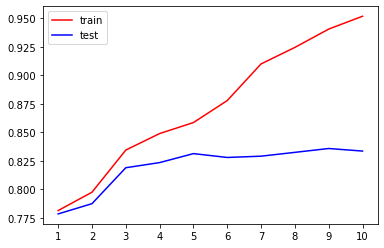

In [74]:
#用两个空列表来存储对应的分数
import matplotlib.pyplot as plt
tr = []
te = []

#画个学习曲线
for i in range(10):
    clf = RandomForestClassifier(random_state=25
                                ,max_depth=i+1
                                ,criterion="entropy" 
                                )
    clf.fit(Xtrain,Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,X,y,cv=10).mean()    
    tr.append(score_tr)
    te.append(score_te)
    
#输出测试集的最大值
print(max(te))
#开始画图,画两条曲线是为了观察不同最大深度下对于训练/测试集不同的拟合结果
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
#修改横坐标标尺，不写的话不一定会显示1到10的整数
plt.xticks(range(1,11))
plt.legend()
plt.show()

#这里为什么使用“entropy”？因为我们注意到，在最大深度=3的时候，模型拟合不足，在训练集和测试集上的表现接近，但却都不是非常理想，只能够达到83%左右，所以我们要使用entropy。

**7.** 用网格搜索调整参数

In [72]:
#网格搜索：能够同时调整多个参数，枚举技术；我们需要先确定好搜索范围，不然会导致很长的运行时间

In [16]:
rfc = RandomForestClassifier()
param_grid = {
    "n_estimators": [120, 200, 360, 450, 500],
    "max_depth": [5, 9, 18, 27, 36]
}
GS = GridSearchCV(rfc, param_grid=param_grid, cv=5)
GS.fit(Xtrain, Ytrain)

# 最佳准确度
print(GS.score(Xtest, Ytest))

# 最佳参数
print(GS.best_params_)


E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

0.846441947565543
{'max_depth': 9, 'n_estimators': 500}


In [17]:
#网格搜索的两重要接口：

GS.best_params_ #从输入的参数和参数取值列表中返回最佳组合

{'max_depth': 9, 'n_estimators': 500}

In [18]:
GS.best_score_ #网格搜索后的模型的评价标准

0.8216516129032257

In [19]:
df_test = pd.read_csv('E:/test.csv')
df_test.drop(["PassengerId","Cabin","Name","Ticket"],inplace=True,axis=1)
df_test["Age"] = df_test["Age"].fillna(df_test["Age"].mean())
df_test = df_test.dropna()
df_test["Sex"] = (df_test["Sex"]== "male").astype("int")
labels = df_test["Embarked"].unique().tolist()
df_test["Embarked"] = df_test["Embarked"].apply(lambda x: labels.index(x))

clf.fit(X,y)

df_test['Survived']=pd.DataFrame(clf.predict(df_test))
res = pd.concat([df_test['PassengerId'],pd.DataFrame(clf.predict(test_data))],axis=1)
res.columns = ['PassengerId','Survived']
res.to_csv("result.csv",sep=',',index=False)

df_survive = df_test['Survived'].value_counts(normalize=True)
n0_sample = df_survive[0]
n1_sample = df_survive[1]
print('死亡人数占{:.2%}; 幸存人数占{:.2%}'.format(n0_sample,n1_sample))

C:\Users\沈君君\AppData\Local\Temp\ipykernel_22448\1442433265.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X,y)


KeyError: 'PassengerId'

In [ ]:
RandomForestClassifier()